In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

## Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

In [11]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054.0,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946.0,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791.0,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854.0,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033.0,2018,1


In [12]:
df.rename(columns={'데이터':'백만'}, inplace=True)

In [13]:
df['연도'] = df['시점'].map(lambda x:int(x.split('.')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054.0,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946.0,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791.0,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854.0,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033.0,2018,1


In [14]:
df['분기'] = df['시점'].map(lambda x : int(x.split('.')[1].split('/')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054.0,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946.0,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791.0,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854.0,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033.0,2018,1


In [15]:
df['백만'] = df['백만'].replace('-', np.nan).astype(float)
df['백만']

0       1054.0
1        946.0
2        791.0
3        854.0
4       2033.0
         ...  
2767    1278.0
2768    1154.0
2769    1076.0
2770    2325.0
2771     725.0
Name: 백만, Length: 2772, dtype: float64

In [16]:
df.dtypes

국가(대륙)별     object
상품군별        object
판매유형별       object
시점          object
백만         float64
연도           int64
분기           int64
dtype: object

In [17]:
df.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


- 해당 통계로 알 수 있는 점은 총 데이터의 수, 각 칼럼의 평균, 표준편차, 최소값, 2사분위, 3사분위, 중간값, 최대값을 알 수 있다

## Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.


In [18]:
df_pivot = df.pivot_table(index='국가(대륙)별', values='백만', columns='연도', aggfunc=sum )
df_pivot

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571.0,36141.0,40950.0,44438.0,57959.0,19501.0
대양주,18989.0,17520.0,13191.0,16255.0,16841.0,5044.0
미국,142292.0,156312.0,186617.0,255384.0,277579.0,103416.0
아세안(ASEAN),66163.0,76450.0,82930.0,105360.0,94150.0,38072.0
유럽연합(EU),31068.0,36826.0,39008.0,39865.0,32349.0,9019.0
일본,125442.0,178094.0,189330.0,220730.0,280029.0,131771.0
중국,167240.0,182068.0,210418.0,289446.0,194380.0,98572.0
중남미,10245.0,11669.0,12981.0,12563.0,8298.0,2629.0
중동,8030.0,8019.0,9325.0,11467.0,6164.0,1389.0


<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

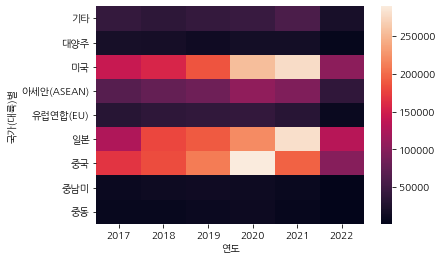

In [19]:
sns.heatmap(df_pivot)

## Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

## Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

In [20]:
df['국가(대륙)별'].unique()

array(['미국', '중국', '일본', '아세안(ASEAN)', '유럽연합(EU)', '중동', '중남미', '대양주',
       '기타'], dtype=object)

In [22]:
df['상품군별'].unique()

array(['컴퓨터 및 주변기기', '가전·전자·통신기기', '소프트웨어', '서 적', '사무·문구', '음반·비디오·악기',
       '의류 및 패션 관련상품', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품', '농축수산물',
       '생활용품 및 자동차용품', '기 타'], dtype=object)

In [24]:
df2 = df[df['국가(대륙)별'].str.contains('미국|중국|일본')]
df2 = df2[df2['상품군별'].str.contains('화장품|음반·비디오|의류')]

In [25]:
df2['국가(대륙)별'].unique()

array(['미국', '중국', '일본'], dtype=object)

In [26]:
df2['상품군별'].unique()

array(['음반·비디오·악기', '의류 및 패션 관련상품', '화장품'], dtype=object)

In [27]:
df2.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922.0,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778.0,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281.0,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647.0,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362.0,2018,1


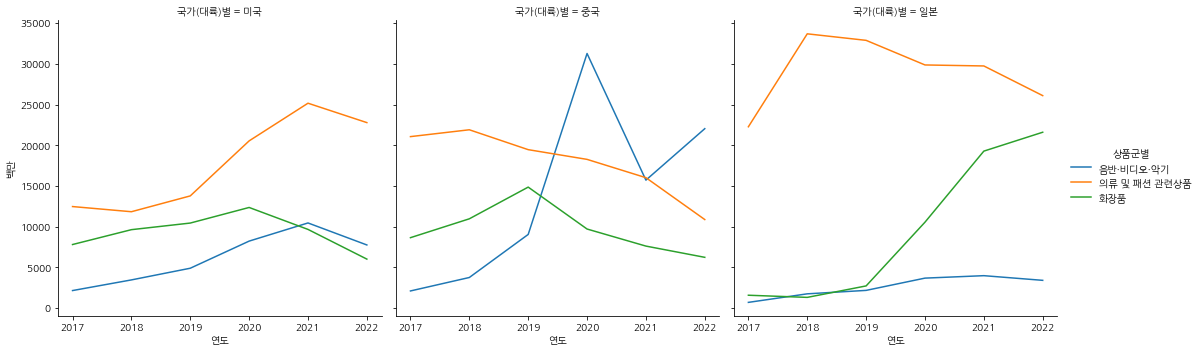

In [35]:
sns.relplot(data=df2, x='연도',y='백만', hue='상품군별',col='국가(대륙)별', kind='line', ci=None)